<a href="https://colab.research.google.com/github/dhani7g/eCommerce-Transcations/blob/main/Dhwani_Gandhi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

CUSTMER DATASET :

In [6]:
customers.shape


(200, 4)

In [7]:
display(customers.head())

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [15]:
customers.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [19]:
display("Unique Regions and Counts:")
display(customers['Region'].value_counts())

'Unique Regions and Counts:'

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


PRODUCTS DATASET :

In [31]:
products.shape

(100, 4)

In [30]:
display(products.head())

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [17]:
products.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [20]:
display("Unique Product Categories and Counts:")
display(products['Category'].value_counts())

'Unique Product Categories and Counts:'

,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


TRANSACTIONS DATASET :

In [9]:
transactions.shape

(1000, 7)

In [11]:
display(transactions.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [18]:
transactions.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [21]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

In [22]:
display("Merged Dataset Shape:", merged_data.shape)
display(merged_data.head())

'Merged Dataset Shape:'

(1000, 13)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [25]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

In [28]:
transaction_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

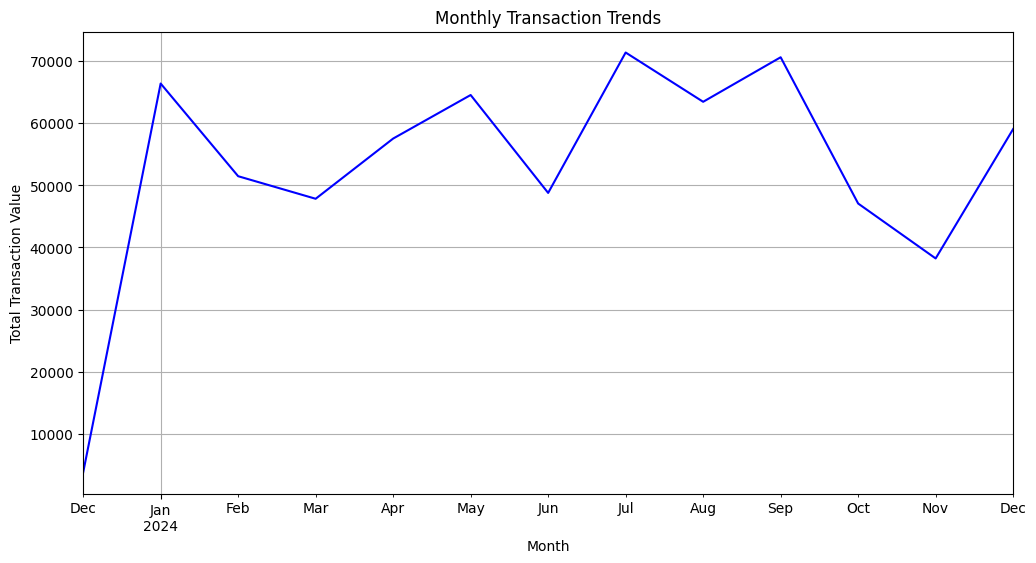

In [29]:
plt.figure(figsize=(12, 6))
transaction_trend.plot(kind='line', title="Monthly Transaction Trends", xlabel="Month", ylabel="Total Transaction Value", color='blue')
plt.grid()
plt.show()

In [32]:
customer_purchase_counts = merged_data.groupby('CustomerID').size()

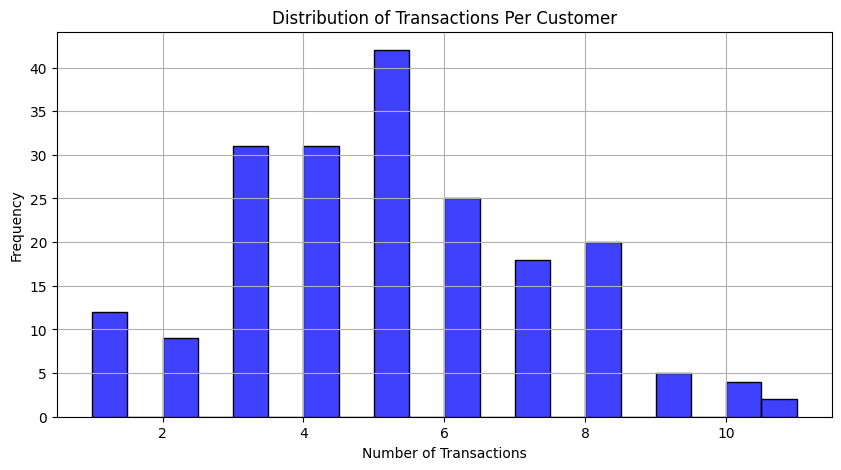

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(customer_purchase_counts, kde=False, bins=20, color='blue')
plt.title('Distribution of Transactions Per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [34]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

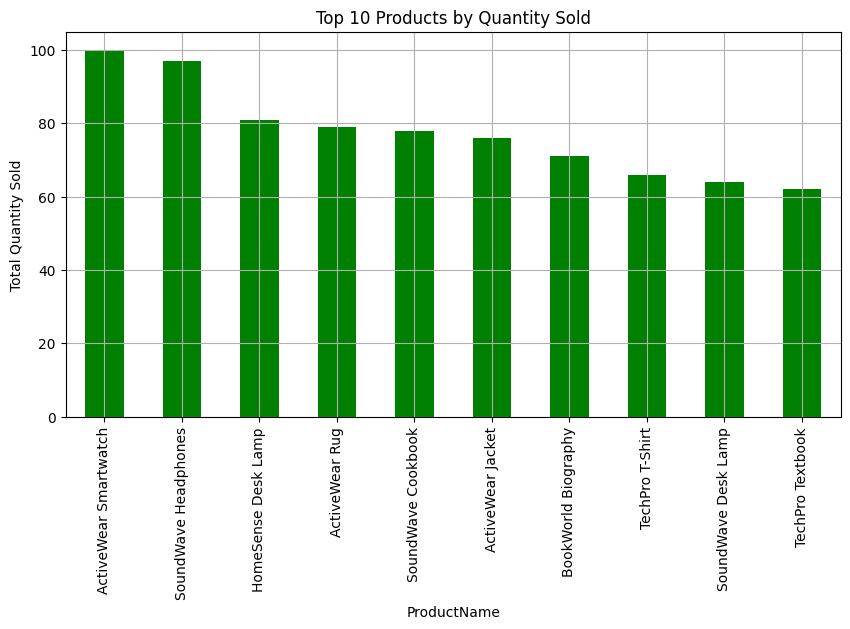

In [35]:
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', title="Top 10 Products by Quantity Sold", color='green')
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

In [36]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

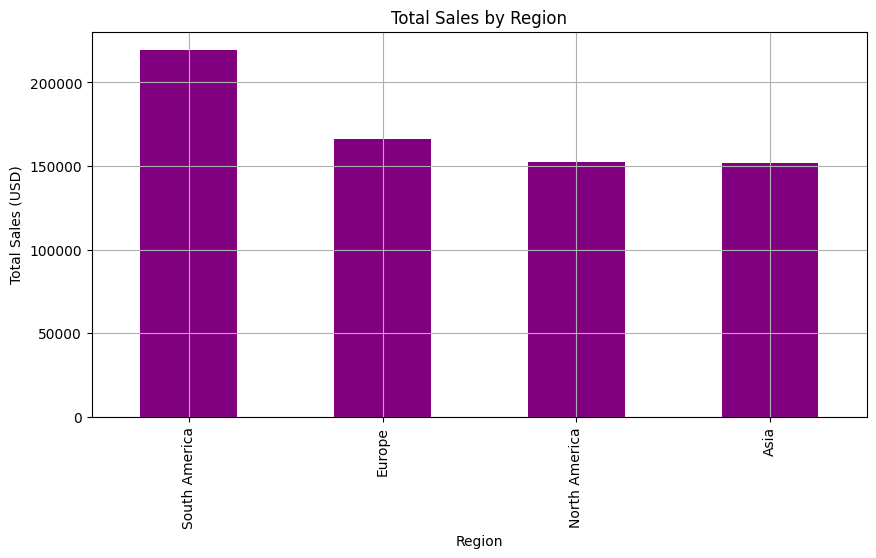

In [37]:
plt.figure(figsize=(10, 5))
region_sales.plot(kind='bar', title="Total Sales by Region", color='purple')
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

In [38]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

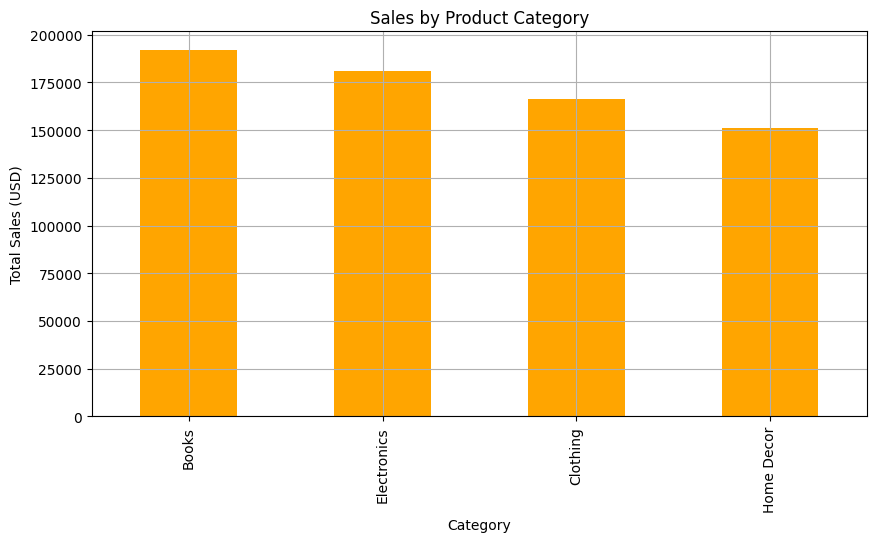

In [39]:
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', title="Sales by Product Category", color='orange')
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()